In [8]:
import base64
from skimage import img_as_ubyte
import skimage.io
from io import StringIO, BytesIO
from PIL import Image
import math
import json

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from PIL import Image

/home/csaba/miniconda3/envs/seg/lib/python3.7/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper
/home/csaba/miniconda3/envs/seg/lib/python3.7/site-packages/skimage/io/manage_plugins.py:294: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  fromlist=[modname])


In [9]:
data_dir = Path('/home/csaba/packages/pytorch-image-models/data')

In [10]:
true_images_path_list = list(data_dir.joinpath('true').rglob('*'))

In [11]:
len(true_images_path_list)

18707

In [33]:
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from PIL import Image
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler


class CustomBinary(Dataset):
    def __init__(self, data_path, transform=None):
        self.true = list(data_dir.joinpath('true').rglob('*'))
        self.false = list(data_dir.joinpath('false').rglob('*'))
#         self.height = 48
#         self.width = 48
        self.transform = transform

    def __getitem__(self, index):
        # This method should return only 1 sample and label 
        # (according to "index"), not the whole dataset
        # So probably something like this for you:
        if index < len(self.true):
            image = np.array(Image.open(self.true[index]))
#             image = read_image(str(self.true[index]))
            label = True
        else:
            image = np.array(Image.open(self.false[index-len(self.true)]))
#             image = read_image(str(self.false[index-len(self.true)]))
            label = False
            
        return image, label

    def __len__(self):
        return len(self.true)+len(self.false)
    
dataset = CustomBinary(data_dir)

batch_size = 1
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

In [44]:
train_loader.dataset[0][0].shape

(227, 97)

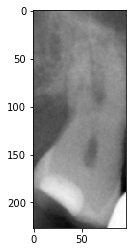

In [43]:
plt.imshow(train_loader.dataset[0][0], cmap='gray')

In [32]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [20]:
len(dataset)

43220

In [24]:
dataset[0][1]

True

In [36]:
import torchvision

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


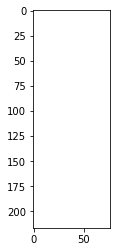

In [38]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [39]:
images

tensor([[[25405, 24856, 24408,  ..., 17240, 16875, 16082],
         [25163, 25351, 24174,  ..., 16676, 16676, 16526],
         [24330, 24096, 24045,  ..., 17057, 16601, 16349],
         ...,
         [ 9542,  9901, 10295,  ...,  6340,  5682,  5792],
         [ 8985,  9218,  9566,  ...,  5504,  5446,  5417],
         [ 8296,  8235,  8312,  ...,  5012,  4853,  4744]]], dtype=torch.int32)

In [30]:
count_True = 0
count_False = 0
for img, target in dataset:
    if target:
        count_True = count_True+1
    else:
        count_False = count_False+1

In [ ]:
count_True = 0
count_False = 0
for a in dataset:
#     print(a[1])
    if a[1]:
        count_True = count_True+1
    else:
        count_False = count_False+1

In [31]:
count_True, count_False

(18707, 24513)

In [13]:
len(indices)

43220

In [34]:
len(train_loader), len(validation_loader), len(train_loader) +len(validation_loader)

(34576, 8644, 43220)

In [15]:
692*50 + 173*50

43250

In [26]:
dataset = CustomBinary(data_dir)

In [27]:
batch_size = 50

In [28]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)

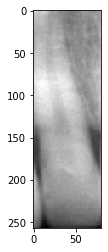

In [34]:
plt.imshow(dataset[40000][0], cmap='gray')

In [36]:
dataset[40000][1]

False

In [43]:
dataset = CustomBinary(data_dir)

batch_size = 50
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

In [7]:
len(train_loader), len(validation_loader)

NameError: name 'train_loader' is not defined

In [ ]:


class CustomDatasetFromCSV(Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.labels = pd.get_dummies(self.data['emotion']).as_matrix()
        self.height = 48
        self.width = 48
        self.transform = transform

    def __getitem__(self, index):
        # This method should return only 1 sample and label 
        # (according to "index"), not the whole dataset
        # So probably something like this for you:
        pixel_sequence = self.data['pixels'][index]
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(self.width, self.height)
        face = cv2.resize(face.astype('uint8'), (self.width, self.height))
        label = self.labels[index]

        return face, label

    def __len__(self):
        return len(self.labels)


dataset = CustomDatasetFromCSV(my_path)
batch_size = 16
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

# Usage Example:
num_epochs = 10
for epoch in range(num_epochs):
    # Train:   
    for batch_index, (faces, labels) in enumerate(train_loader):
        # ...


In [3]:
import timm

In [4]:
timm.__version__

'0.5.0'

In [5]:
!conda list | grep timm

timm                      0.5.0                    pypi_0    pypi


In [6]:
import timm
from pprint import pprint
model_names = timm.list_models(pretrained=True)
pprint(model_names)

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'crossvit_9_240',
 'crossvit_9_dagger_240',
 'crossvit_15_240',
 'crossvit_15_dagger_240',
 'crossvit_15_dagger_408',
 'crossvit_18_240',
 'crossvit_18_dagger_240',
 'crossvit_18_dagger_408',
 'crossvit_base_240',
 'crossvit_small_240',
 'crossvit_tiny_240',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'deit_base_distilled_patch16_224',
 'deit_bas